## Task 1. Reading the .txt file.

In [1]:
f = open("gems.txt")
text = f.read().lower()
f.close()
print(text)


                              released on 02/01/92

     now, after decades of turmoil, hatred, and deceit, it can be told...

         #########   ###########   ###     ###           #########
        ###########  ###########: #####   #####         ###########
        ####:::####:  ::::::::::: ######  ######        ####:::####:
        ####:   ::::  ######      ####### #######       ####:   ::::
========####|#####===#######|=====################=======#########============
========####|######==####||||=====####|#######|####=======|||||####===========
        ####:::####: ####:        ####: ######: ####    ####   ####:
        ###########: ###########  ####:  ####::  ####   ###########:
         #########::  ##########: ####:   ::::    ####   #########::
          :::::::::    ::::::::::  ::::            ::::   :::::::::
          ___     __             ___ __            __  ___ __  _
          /  /_/ /_    / / /| /  /  / / /   /\    /_   /  / / /_> \/
         /  / / /_    /_/ / |/  

In [2]:
text

'\n==============================================================================\n                              released on 02/01/92\n==============================================================================\n\n     now, after decades of turmoil, hatred, and deceit, it can be told...\n\n         #########   ###########   ###     ###           #########\n        ###########  ###########: #####   #####         ###########\n        ####:::####:  ::::::::::: ######  ######        ####:::####:\n        ####:   ::::  ######      ####### #######       ####:   ::::\n========####|#####===#######|=====################=======#########============\n========####|######==####||||=====####|#######|####=======|||||####===========\n        ####:::####: ####:        ####: ######: ####    ####   ####:\n        ###########: ###########  ####:  ####::  ####   ###########:\n         #########::  ##########: ####:   ::::    ####   #########::\n          :::::::::    ::::::::::  ::::            ::::   :

## Task 2. Obtain the file metadata.

In [7]:
import nltk
from nltk import *
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Huawei\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [ ]:
sentences = sent_tokenize(text)
print(sentences)

In [26]:
print("Number of sentences in the text: " + str(len(sentences)))

Number of sentences in the text: 557


In [39]:
word = set(word_tokenize(text))

In [44]:
print("Number of unique tokens obtained with word_tokenize: " + str(len(word)))
print("The mean number of words/sentenc ewith word_tokenize: " + str(len(word) / len(sentences)))

Number of unique tokens obtained with word_tokenize: 2431
The mean number of words/sentenc ewith word_tokenize: 4.364452423698384


In [45]:
casual = set(casual_tokenize(text))
print("Number of unique tokens obtained with casual_tokenize: " + str(len(casual)))
print("The mean number of words/sentenc ewith casual_tokenize: " + str(len(casual) / len(sentences)))

Number of unique tokens obtained with casual_tokenize: 2389
The mean number of words/sentenc ewith casual_tokenize: 4.289048473967684


In [47]:
token = MWETokenizer() 
mwe = set(token.tokenize(text.split()))
print("Number of unique tokens obtained with MWETokenizer: " + str(len(mwe)))
print("The mean number of words/sentenc ewith MWETokenizer: " + str(len(mwe) / len(sentences)))

Number of unique tokens obtained with MWETokenizer: 3001
The mean number of words/sentenc ewith MWETokenizer: 5.3877917414721725


In [50]:
unique = word.union(casual, mwe)
len(unique)

3345

## Task 3. Comparing the Stemmers.

In [79]:
import pandas as pd
df = pd.DataFrame()
df['original_token'] = list(unique)

In [80]:
stemmers = [PorterStemmer(), LancasterStemmer(), SnowballStemmer(language='english')]
for stemmer in stemmers:
    new_list = list()
    for word in unique:
        new_list.append(stemmer.stem(word))
    df[str(stemmer)] = new_list

In [82]:
df.columns = ['original_token', 'Porter', 'Lancaster', 'Snowball']

In [83]:
df

,original_token,Porter,Lancaster,Snowball
0,something,someth,someth,someth
1,lost,lost,lost,lost
2,shattered,shatter,shat,shatter
3,diamonds.,diamonds.,diamonds.,diamonds.
4,tokyo,tokyo,tokyo,tokyo
...,...,...,...,...
3340,i,i,i,i
3341,"(ie,","(ie,","(ie,","(ie,"
3342,fused,fuse,fus,fuse
3343,ownership.,ownership.,ownership.,ownership.


## Task 4. Frequencies of words.

In [150]:
freq_dist = FreqDist(casual_tokenize(text))

In [151]:
freq_dist.most_common(10)

[('the', 747),
 ('.', 597),
 (',', 458),
 ('a', 432),
 ('to', 354),
 ('of', 345),
 ('and', 338),
 ('is', 292),
 ('in', 226),
 ('stone', 176)]

In [92]:
hapaxes = freq_dist.hapaxes()

In [93]:
len(hapaxes)

1267

In [180]:
tokens = freq_dist.items()
tokens_list = list()
for x in tokens:
    tokens_list.append(x)

In [182]:
tokens_list.sort(key = lambda a: a[1], reverse=True)

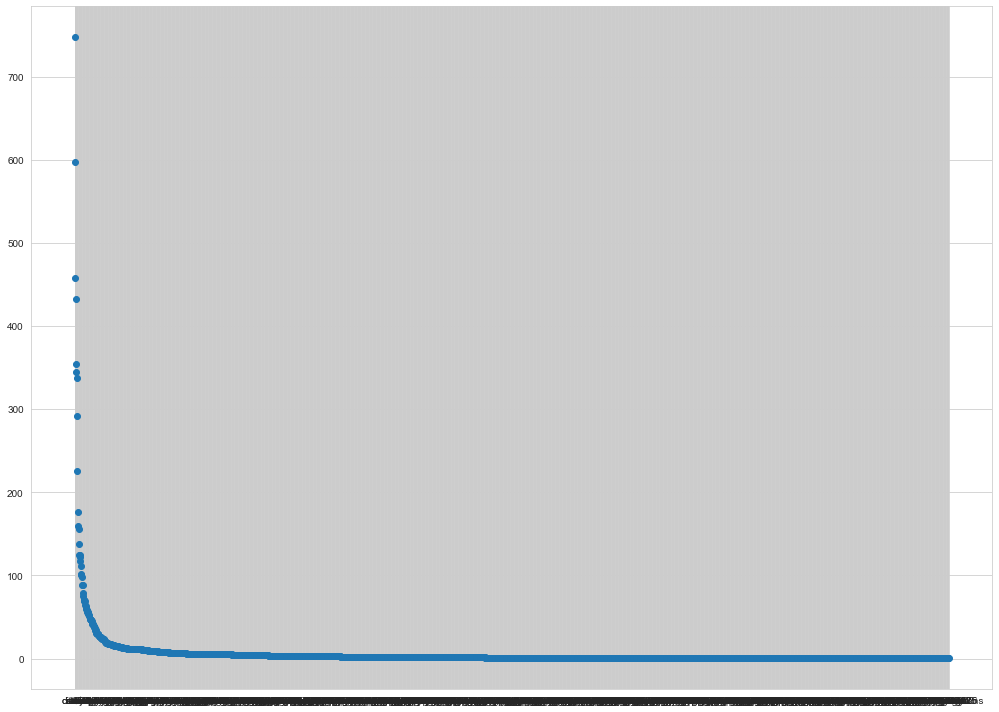

In [184]:
zip(*tokens_list)
plt.scatter(*zip(*tokens_list))


## Task 5. Part of speech tagging.

In [356]:
pos = pos_tag(casual_tokenize(text))

In [357]:
pos_list = list()
for chunk in ne_chunk(pos):
    pos_list.append(chunk)

In [359]:
pos_list

[('=', 'JJ'),
 ('=', 'NNP'),
 ('=', 'NNP'),
 ('released', 'VBD'),
 ('on', 'IN'),
 ('02/01', 'CD'),
 ('/', 'JJ'),
 ('92', 'CD'),
 ('=', 'JJ'),
 ('=', 'NNP'),
 ('=', 'NN'),
 ('now', 'RB'),
 (',', ','),
 ('after', 'IN'),
 ('decades', 'NNS'),
 ('of', 'IN'),
 ('turmoil', 'NN'),
 (',', ','),
 ('hatred', 'VBN'),
 (',', ','),
 ('and', 'CC'),
 ('deceit', 'NN'),
 (',', ','),
 ('it', 'PRP'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('told', 'VBN'),
 ('...', ':'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 (':', ':'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('::', 'NN'),
 (':', ':'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 (':', ':'),
 ('::', 'NN'),
 (':', ':'),
 (

In [358]:
pos_set = set(pos_list)

TypeError: unhashable type: 'Tree'

In [217]:
unique_pos = set()
lsst = []
for x in pos_list:
    key = x[1]
    print(key)

JJ
NNP
NNP
VBD
IN
CD
JJ
CD
JJ
NNP
NN
RB
,
IN
NNS
IN
NN
,
VBN
,
CC
NN
,
PRP
MD
VB
VBN
:
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
:
#
#
#
#
#
#
#
#
#
#
#
#
NN
:
#
#
#
:
NN
:
#
#
#
#
#
#
#
#
#
NN
:
#
#
#
:
#
#
#
:
NN
:
#
#
#
#
#
#
#
#
#
#
#
#
:
NN
:
JJ
NNP
NNP
#
#
#
NNP
#
#
#
NNP
NNP
NNP
#
#
#
NNP
NNP
NNP
#
#
#
NNP
NNP
NNP
#
#
#
NNP
NNP
NNP
NNP
NNP
NNP
#
#
#
NNP
#
#
#
NNP
NNP
#
#
#
NNP
NNP
NNP
NNP
NNP
#
#
#
NNP
#
#
#
NNP
#
#
#
NNP
NNP
NNP
NNP
NNP
#
#
#
NNP
NNP
NNP
#
#
#
NN
:
#
#
#
:
#
#
#
:
#
#
#
:
#
#
#
:
#
#
#
#
#
#
#
#
#
:
#
#
#
:
#
#
#
#
#
#
:
#
#
#
NNP
#
#
#
#
#
#
:
#
#
#
NNP
#
#
#
:
#
#
#
:
NN
:
#
#
#
#
#
#
JJ
NN
:
NN
:
NN
:
NN
:
NN
:


IndexError: list index out of range

In [300]:
pos_list = [x for x in pos_list if x[0] not in ['/']]

In [444]:
output = [x[0] for x in pos_list2 if x[1] == 'NN']

IndexError: list index out of range

In [442]:
output

['::']

In [443]:
pos_list2 = pos_list[250:300]

In [419]:
pos_list2

[('=', 'JJ'),
 ('=', 'NNP'),
 ('=', 'NNP'),
 ('released', 'VBD'),
 ('on', 'IN'),
 ('02/01', 'CD'),
 ('/', 'JJ'),
 ('92', 'CD'),
 ('=', 'JJ'),
 ('=', 'NNP'),
 ('=', 'NN'),
 ('now', 'RB'),
 (',', ','),
 ('after', 'IN'),
 ('decades', 'NNS'),
 ('of', 'IN'),
 ('turmoil', 'NN'),
 (',', ','),
 ('hatred', 'VBN'),
 (',', ','),
 ('and', 'CC'),
 ('deceit', 'NN'),
 (',', ','),
 ('it', 'PRP'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('told', 'VBN'),
 ('...', ':'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 (':', ':')]

In [228]:
arr= []

In [235]:
pos_list

[('=', 'JJ'),
 ('=', 'NNP'),
 ('=', 'NNP'),
 ('released', 'VBD'),
 ('on', 'IN'),
 ('02/01', 'CD'),
 ('/', 'JJ'),
 ('92', 'CD'),
 ('=', 'JJ'),
 ('=', 'NNP'),
 ('=', 'NN'),
 ('now', 'RB'),
 (',', ','),
 ('after', 'IN'),
 ('decades', 'NNS'),
 ('of', 'IN'),
 ('turmoil', 'NN'),
 (',', ','),
 ('hatred', 'VBN'),
 (',', ','),
 ('and', 'CC'),
 ('deceit', 'NN'),
 (',', ','),
 ('it', 'PRP'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('told', 'VBN'),
 ('...', ':'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 (':', ':'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('::', 'NN'),
 (':', ':'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 (':', ':'),
 ('::', 'NN'),
 (':', ':'),
 (

In [382]:
new_dict = {}
 
# a for loop to iterate the list of tuples
for i in pos_list2:
    # checking whether the dictionary
    # has the key already.
    # If it returns No, a new Key is created.
    # If the key is not present the first
    # value of the tuple is made as the key
    if new_dict.get(i[1], 'No') == 'No':
       
          # THe remaining element is
        # made as values of the key
        new_dict[i[1]] = i[0]
        
    else:
       
          # If the key is already present assign
        # the remaining element as values to
        # the corresponding key
          # add the values to the tuples and them
        # convert them to list using list() function
        
        new_dict[i[1]] = list(new_dict.get(i[1])).append(i[0])
    print(new_dict[i[1]])

print(new_dict)

=
=
None
released
on
02/01
{'JJ': '=', 'NNP': None, 'VBD': 'released', 'IN': 'on', 'CD': '02/01'}


In [403]:
pos_list2 = pos_list[:30]

In [389]:
pos_list2

[('=', 'JJ'),
 ('=', 'NNP'),
 ('=', 'NNP'),
 ('released', 'VBD'),
 ('on', 'IN'),
 ('02/01', 'CD')]

In [371]:
pos_list

[('=', 'JJ'),
 ('=', 'NNP'),
 ('=', 'NNP'),
 ('released', 'VBD'),
 ('on', 'IN'),
 ('02/01', 'CD'),
 ('/', 'JJ'),
 ('92', 'CD'),
 ('=', 'JJ'),
 ('=', 'NNP'),
 ('=', 'NN'),
 ('now', 'RB'),
 (',', ','),
 ('after', 'IN'),
 ('decades', 'NNS'),
 ('of', 'IN'),
 ('turmoil', 'NN'),
 (',', ','),
 ('hatred', 'VBN'),
 (',', ','),
 ('and', 'CC'),
 ('deceit', 'NN'),
 (',', ','),
 ('it', 'PRP'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('told', 'VBN'),
 ('...', ':'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 (':', ':'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 ('::', 'NN'),
 (':', ':'),
 ('#', '#'),
 ('#', '#'),
 ('#', '#'),
 (':', ':'),
 ('::', 'NN'),
 (':', ':'),
 (